<center>
<img src="https://imgs.xkcd.com/comics/convincing.png" height="200">

# Прикладаная статистика: домашнее задание 1
</center>

> — Куда ты теперь, Док? Назад в будущее? <br>
>  — Нет, там я уже был.

$\qquad$ $\qquad$ $\qquad$ $\qquad$ **(«Назад в будущее 3»)**


**ФИО:** Куликов Дмитрий Алексеевич

**Забавный факт о себе:** Я никогда не ел холодец

## Общая информация


__Дата выдачи:__ 27.02.2023

__Дедлайн:__ 23:59MSK 02.04.2023

## Формат сдачи

Сам ноутбук называйте в формате hw-01-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл надо будет, как обычно, сдать в anytask.

## Оформление

1. Be good, drink milk and [think of Russia](https://www.youtube.com/watch?v=jyxSFfBKMxQ)
2. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
3. Вверху файла подпишите фамилию, имя, группу и какой-то занимательный факт о себе.
4. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.


Для каждого построенного графика делайте выводы. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/king.png" width="300">
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/bad_lines.png" width="600">
</center>

Это домашнее задание состоит из двух частей:

- Часть с кодом
- Часть с ручными задачами

Часть с кодом должна быть оформлена на в юпитерской тетрадке. Весь код необходимо писать на python.

Ручную часть можно решать на бумаге и оформить в виде отсканированной pdf-ки с разборчивым почерком. Можно вбить решение в виде формул прямо в юпитерскую тетрадку, можно сделать pdf-ку в техе.

## Часть 1: ручная

За эту часть можно набрать 50 баллов. Также можно набрать бонусные 15 баллов.

Условия задач [лежат по ссылке](https://github.com/FUlyankin/yet_another_matstat_course/blob/main/hw_matstat/yam_hw01-hakuna_matata_tasks.pdf)

## Часть 2: парадоксальная

За эту часть можно набрать 50 баллов.

- подробнее про [парадокс инспектора](https://towardsdatascience.com/the-inspection-paradox-is-everywhere-2ef1c2e9d709)
- подробнее про [парадокс Берксона](https://en.wikipedia.org/wiki/Berkson%27s_paradox)
- забыли как в питоне делать симуляции? Смотрите видео с [первой недели онлайн-курса!](https://www.youtube.com/watch?v=xJV5t4-GsNM&list=PLCf-cQCe1FRxW2QMJbWBl4SSkVAPhId_e&index=6)
- забыли чо такое ЦПТ и ЗБЧ? Смотрите видео с [пятой недели онлайн-курса!](https://www.youtube.com/watch?v=ivpWyorfWlA&list=PLCf-cQCe1FRyg1ajZ2HJVKknbuTujBOLN&index=11)

### Задача 1 (Парадокс Берксона)

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо аппроксимируются
нормальным распределением с ожиданием 60 и стандартным отклонением 10.

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших более $n$ баллов в сумме по русскому и математике.

Для каждого $n$ от $80$ до $160$ с шагом $5$ случайно создайте $10^4$ школьников и поделите их на прошедших и не прошедших в УШЭ.


__а) [5 баллов]__ Постройте график числа прошедших в УШЭ в зависимости от $n$.

__б) [5 баллов]__ Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди прошедших в УШЭ.

__в) [5 баллов]__ Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди не прошедших в УШЭ.

В чём заключается парадокс? Прокомментируйте получившиеся результаты.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

random.seed(42)

In [2]:
mu = 60
sigma = 10

n_start = 80
n_step = 5
n_end = 160 + n_step # не включает границы

count_pupils = 10000

In [3]:
ege_results = {}

for n in range(n_start, n_end, n_step):
  n_passed = 0

  passed_russian = []
  failed_russian = []

  passed_math = []
  failed_math = []

  for pupil in range(count_pupils):
    russian = int(random.normalvariate(mu, sigma))
    math = int(random.normalvariate(mu, sigma))

    if (russian + math) > n:
      passed_russian.append(russian)
      passed_math.append(math)
      n_passed += 1
    else:
      failed_russian.append(russian)
      failed_math.append(math)

  passed_corr = np.corrcoef(passed_russian, passed_math)[0,1]
  failed_corr = np.corrcoef(failed_russian, failed_math)[0,1]

  ege_results[n] = {
                    'n_passed': n_passed,
                    'n_failed': count_pupils - n_passed,
                    'passed_corr': passed_corr,
                    'failed_corr': failed_corr,
                    }

In [4]:
ege_results[80]

{'n_passed': 9962,
 'n_failed': 38,
 'passed_corr': -0.001930071794329284,
 'failed_corr': -0.8936273652715568}

In [5]:
ege_results[160]

{'n_passed': 16,
 'n_failed': 9984,
 'passed_corr': -0.8501392755132055,
 'failed_corr': -0.007328002677385573}

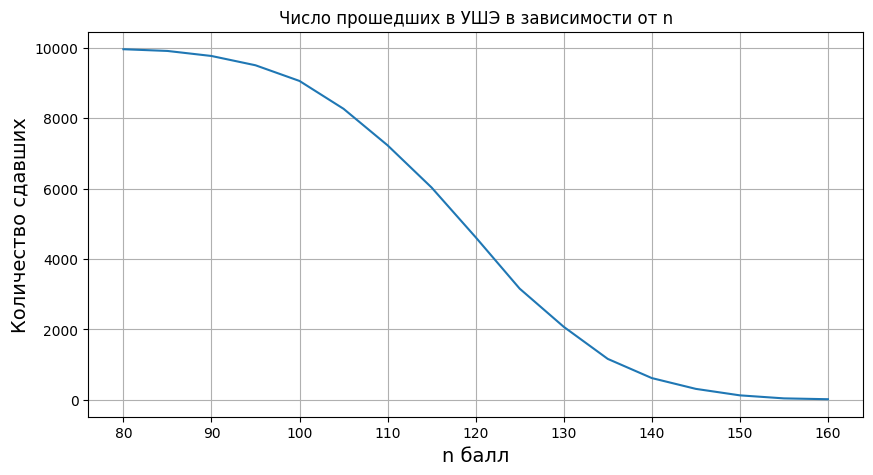

In [6]:
x = np.arange(n_start, n_end, n_step)
y = np.array([ege_results[n]['n_passed'] for n in x])

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title('Число прошедших в УШЭ в зависимости от n')
plt.xlabel('n балл', fontsize=14)
plt.ylabel('Количество сдавших', fontsize=14)
plt.grid(True)
plt.show()

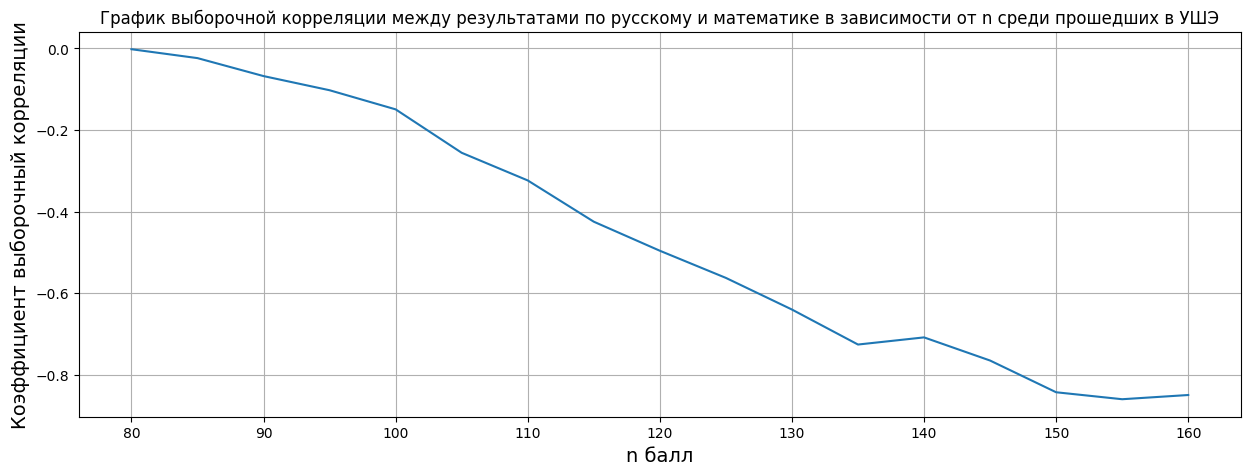

In [7]:
x = np.arange(n_start, n_end, n_step)
y = np.array([ege_results[n]['passed_corr'] for n in x])

plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.title('График выборочной корреляции между результатами по русскому и математике в зависимости от n среди прошедших в УШЭ')
plt.xlabel('n балл', fontsize=14)
plt.ylabel('Коэффициент выборочный корреляции', fontsize=14)
plt.grid(True)
plt.show()

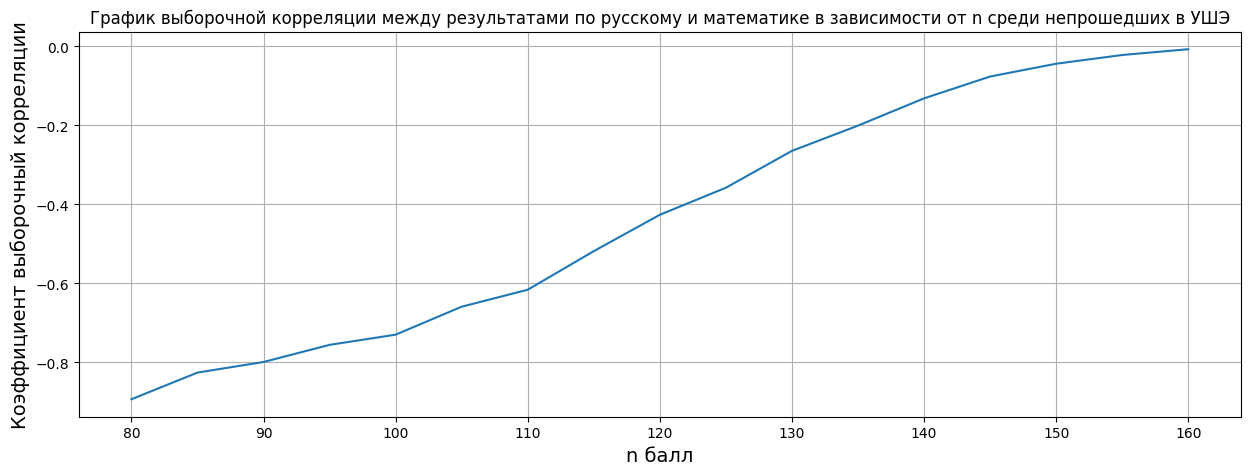

In [8]:
x = np.arange(n_start, n_end, n_step)
y = np.array([ege_results[n]['failed_corr'] for n in x])

plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.title('График выборочной корреляции между результатами по русскому и математике в зависимости от n среди непрошедших в УШЭ')
plt.xlabel('n балл', fontsize=14)
plt.ylabel('Коэффициент выборочный корреляции', fontsize=14)
plt.grid(True)
plt.show()

Парадокс заключается в том, что третья случайная величина добавляет корреляцию предыдущим двум независимым случайным величинам. Это можно увидеть на графике с поступившими в УШЭ, где видна корреляция оценок по математике и русскому языку.

### Задача 2 (Парадокс инспектора)

Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам. Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут ближайшим автобусом.

Проведите $10^4$ экспериментов и с их помощью:

__а) [5 баллов]__ Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже ли визуально распределение на нормальное?

__б) [5 баллов]__ Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

__в) [5 баллов]__ Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

__г) [5 баллов]__ Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

__Пояснения:__ первый автобус можно не включать в выборку, Пумбу за пассажира можно не считать.

В чём заключается парадокс? Прокомментируйте получившиеся результаты.

In [ ]:
def simple_gen():
  return random.choice([5, 10])

In [ ]:
def exp_gen(lmbd=10):
  return math.ceil(random.expovariate(1 / lmbd))

In [ ]:
def modeling_bus_arrivals(func_gen_time):
  cur_time = 0 # 08:00
  end_time = 720 # 20:00

  bus_arrivals = []

  while cur_time < end_time:
    gen_time = func_gen_time()
    cur_time += gen_time

    bus_arrivals.append(cur_time)

  return bus_arrivals

In [ ]:
def planning_research(func_gen_time, n_research=10000):
  count_bus = []
  timon_research = []
  pumba_research = []

  for i in range(n_research):
    bus_arrivals = modeling_bus_arrivals(func_gen_time)
    len_bus_arrivals = len(bus_arrivals)

    # 1 задание
    count_bus.append(len_bus_arrivals)

    # 2 задание
    timon_choice = random.randint(0, len_bus_arrivals - 1)
    timon_research.append(bus_arrivals[timon_choice] - (bus_arrivals[timon_choice - 1] if timon_choice != 0 else 0))

    # 3 задание
    pumba_arrival = random.randint(1, 720)

    for j in range(len_bus_arrivals):
      if pumba_arrival <= bus_arrivals[j]:
          pumba_research.append(bus_arrivals[j] - (bus_arrivals[j - 1] if j != 0 else 0))
          break

  return count_bus, timon_research, pumba_research

In [ ]:
count_bus, timon_research, pumba_research = planning_research(simple_gen)

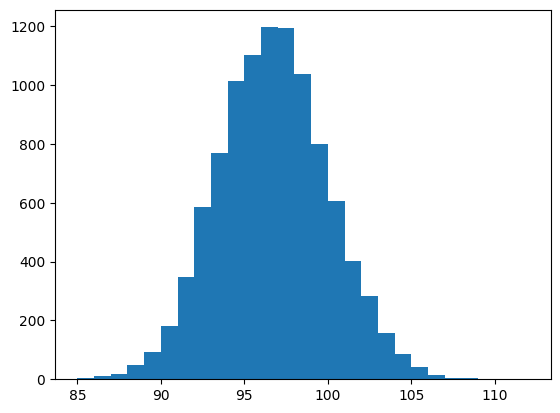

In [ ]:
plt.hist(count_bus, max(count_bus) - min(count_bus));

Визуально распределение похоже на нормальное

Оценки исследований Тимона

In [ ]:
np.mean(timon_research)

7.5285

In [ ]:
np.var(timon_research)

6.24918775

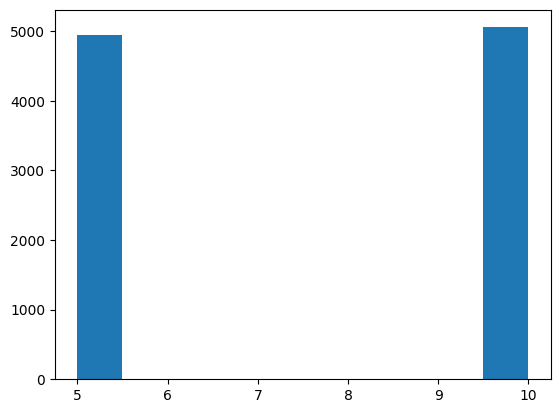

In [ ]:
plt.hist(timon_research);

Оценки исследований Пумбы

In [ ]:
np.mean(pumba_research)

8.3595

In [ ]:
np.var(pumba_research)

5.511259750000001

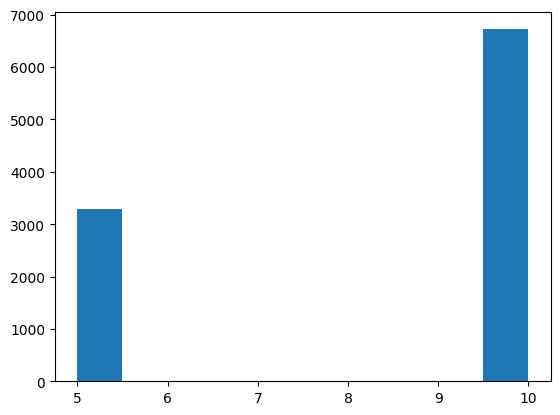

In [ ]:
plt.hist(pumba_research);

Пункт Г

In [ ]:
count_bus_exp, timon_research_exp, pumba_research_exp = planning_research(exp_gen)

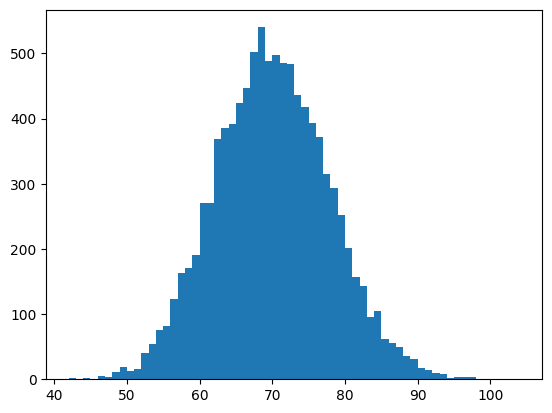

In [ ]:
plt.hist(count_bus_exp, max(count_bus_exp) - min(count_bus_exp));

 Оценки исследований Тимона

In [ ]:
np.mean(timon_research_exp)

10.4914

In [ ]:
np.var(timon_research_exp)

99.52592604000002

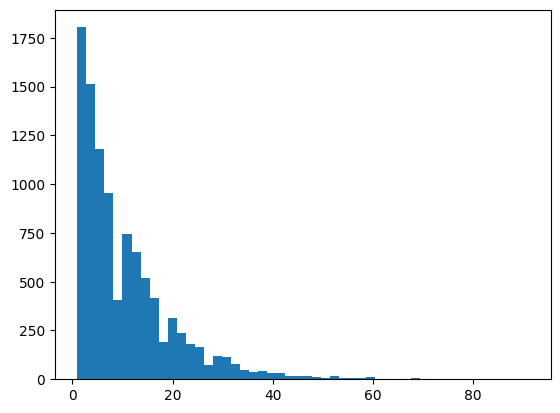

In [ ]:
plt.hist(timon_research_exp, 50);

Оценки исследований Пумбы

In [ ]:
np.mean(pumba_research_exp)

19.854

In [ ]:
np.var(pumba_research_exp)

194.08468400000004

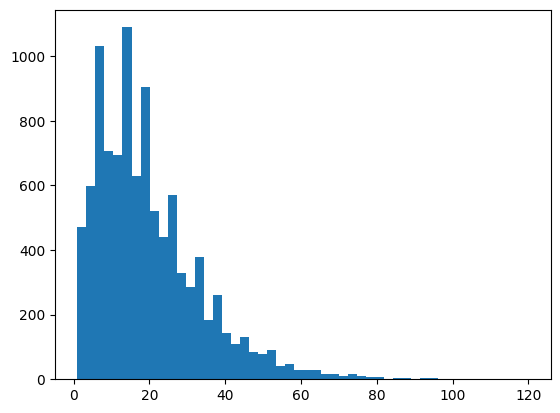

In [ ]:
plt.hist(pumba_research_exp, 50);

Парадокс заключается в том, что у пассажиров автобусов есть сложившееся ложное мнение о долгом ожидании автобуса. Общее мнение считается неправильно, т.к. при задержке автобуса, т.е. большом интервале, количество людей севших в него на автостанции значительно больше и их мнение учитывается несколько раз. Поэтому у людей ложное представление об интервалах. Если средний интервал между автобусами составляет $N$ минут, то среднее время ожидания для пассажиров составляет $2N$ минут

### Задача 3 (что-то похожее на ЦПТ, но в обратную сторону)

Автору домашки вкинули эту задачу в качестве вступительного испытания на стажировку. В листочке было около десяти похожих задач. Решать надо было руками без компьютера. Но мы попробуем с.

Пусть $X \sim N(0, \sigma^2)$. Пусть $\Phi(x)$ — функция распределения для $N(0,1)$. Нужно найти математическое ожидание для случайной величины $\Phi(X)$.

__а) [2.5 балла]__ Оцените $\mathbb{E}(\Phi(X))$ с помощью симуляций

__б) [2.5 балла]__ Постройте для случайной величины $\Phi(X)$ гистограмму. Возьмите $\sigma = 1$, после $\sigma = 3$, после $\sigma = 100$. Как ведёт себя распределение при росте дисперсии? Как думаете, к какой случайной величине сойдётся это распределение?

Пункт а)

In [17]:
from scipy.stats import norm

In [19]:
X = norm(loc=0, scale=1)
phi = norm(loc=0, scale=1).cdf

In [24]:
values = phi(X.rvs(size=10**4, random_state=228))
tmps = np.arange(1, len(values) + 1)
expect = np.cumsum(values) / tmps

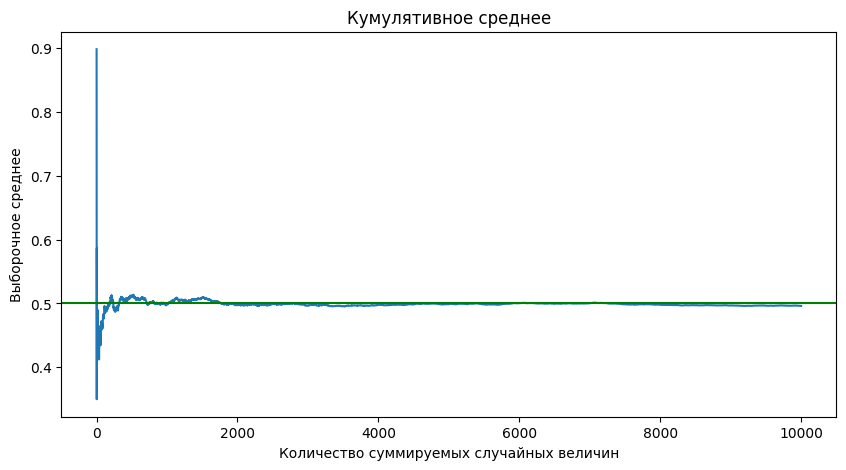

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(tmps, expect)
plt.axhline(0.5, color='g')
plt.title('Кумулятивное среднее')
plt.xlabel('Количество суммируемых случайных величин')
plt.ylabel('Выборочное среднее');

Видимо $\mathbb{E}(\Phi(X))$ = 0.5

Пункт Б

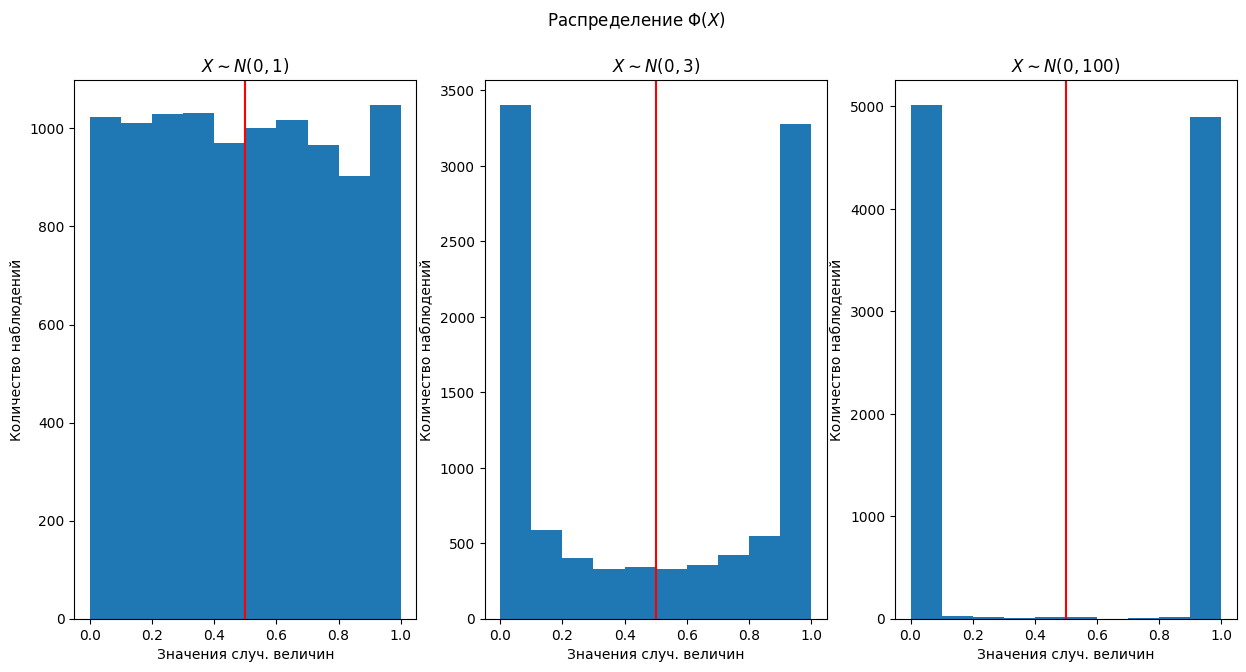

In [35]:
sigmas = [1, 3, 100]

fig, axes = plt.subplots(1, 3, figsize=(15,7))
fig.suptitle('Распределение $\Phi(X)$')
for i, sigma in enumerate(sigmas):
  X = norm(loc=0, scale=sigma)
  values = phi(X.rvs(size=10**4, random_state=228))
  axes[i].hist(values)
  axes[i].set_title(f'$X \sim N(0, {sigma})$')
  axes[i].set_xlabel('Значения случ. величин')
  axes[i].set_ylabel('Количество наблюдений')
  axes[i].axvline(0.5, color='r')

При росте дисперсии величина $\Phi(X)$ чаще принимает значения 0 и 1. Скорее всего эта величина сойдется к распределению Бернулли

### Задача 4 (квантильное преобразование)

В прошлом семестре мы с вами говорили про квантильное преобразование, но ни разу его не использовали. Давайте это исправим.

Пуcть у нас есть стрёмная функция распределения:

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

__[2.5 балла]__ Сгенерируйте из него выборку с помощью квантильного преобразования. Параметры $\alpha$ и $\theta$ возьмите на свой вкус.

P.S. [видео, которое поможет](https://www.youtube.com/watch?v=ivpWyorfWlA&list=PLCf-cQCe1FRyg1ajZ2HJVKknbuTujBOLN&index=11)

Пусть $\alpha = 0.8, \theta = 4$

$$
F(x) = \left( \frac{\ln x}{\ln 4} \right)^{0.8},  \quad x \in [1; 4]
$$

In [12]:
from scipy.stats import uniform

n_obs = 10**6
uniform_rv = uniform(1, 4)

y = uniform_rv.rvs(n_obs)

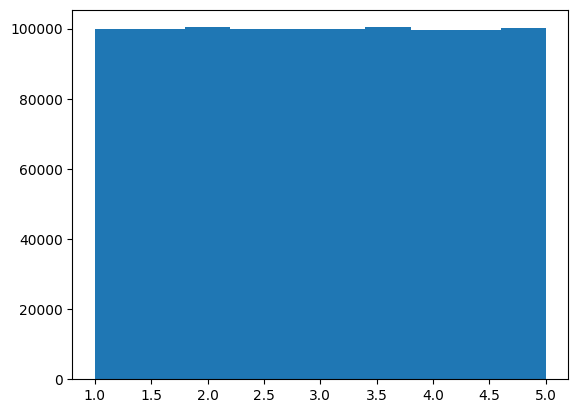

In [13]:
plt.hist(y);

Обратная функция:

image.png

In [14]:
x = 1.38629 ** (y ** 1.25)

In [15]:
np.mean(x)

4.514592985490276

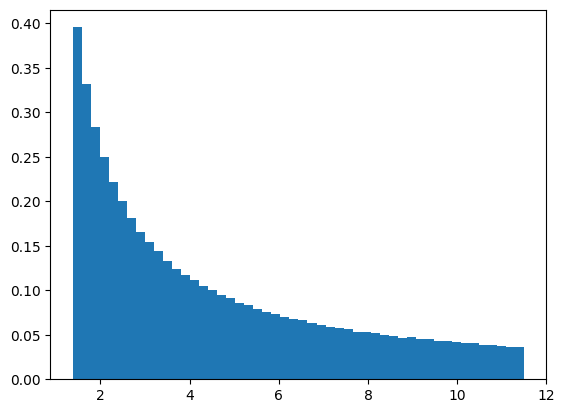

In [16]:
plt.hist(x, density = True, bins=50);

### Задача 5 (свойства оценок)

У Дианы есть выборка $X_1, \dots, X_n \sim iid N(0, \sigma^2)$. Она собирается использовать для параметра $\sigma$ нестандартную оценку $\hat \sigma = \frac{1}{n} \sum_{i=1}^n |x_i|$.

Пусть природа решила, что $\sigma^2 = 16$.

__а) [5 баллов]__ С помощью симуляций проверьте несмещённость оценки, состоятельность оценки.

__б) [2.5 балла]__ Решая задачку руками, вы получили скорректированную на смещение $\hat \sigma.$ Постройте на одном графике распределение для неё и для классической $\hat s$. Какая из них эффективнее?

P.S. [несколько видео, которое помогут иши тут](https://www.youtube.com/watch?v=arYqiJcyE2s&list=PLCf-cQCe1FRxdjkT1RjdmuFeco11U8ZIP)

In [ ]:
from scipy.stats import norm

In [ ]:
sigma = 4
X = [norm(loc=0, scale=sigma).rvs(size=i) for i in range(10**3, 10**5, 100)]
sigma_ =  list(map(lambda xi: sum(abs(xi)) / len(xi), X))

In [ ]:
mean_sigma_ = np.mean(sigma_)
mean_sigma_

3.191839331820137

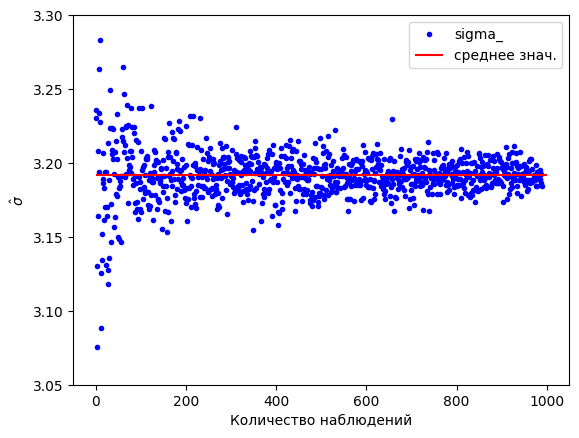

In [ ]:
plt.plot(sigma_,'b.', label='sigma_')
plt.hlines(y=mean_sigma_, xmin=0, xmax=1000, colors='r', label='среднее знач.')
plt.ylim([3.05, 3.3])
plt.xlabel('Количество наблюдений')
plt.ylabel('$\hat{\sigma}$')
plt.legend()
plt.show()

Таким образом, оценка имеет смещенность. Для выполненных симуляций математическое ожидание примерно равно 3.192, а заданное значение sigma = 4

In [ ]:
sigma_corr = [np.sqrt(2*np.pi)/2*i for i in sigma_]
bias = [i - sigma for i in sigma_corr]

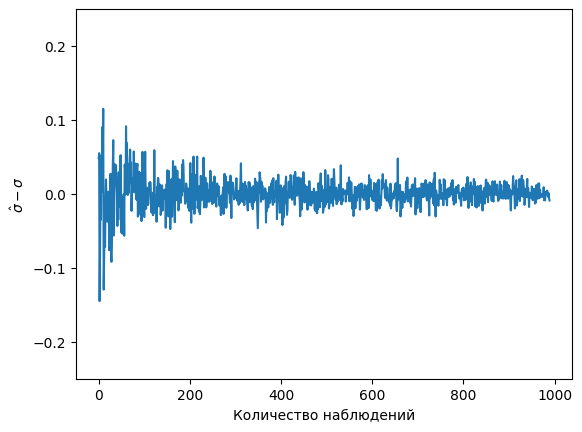

In [ ]:
plt.plot(bias)
plt.ylim([-0.25, 0.25])
plt.xlabel('Количество наблюдений')
plt.ylabel('$\hat{\sigma} - \sigma$');

По графику видно состоятельность скорректированной оценки

In [ ]:
sigma_original = []

for x in X:
  val = 0
  sz = len(x)
  sm = sum(x)
  for j in range(sz):
     val += (x[j] - 1 / sz * sm)**2
  sigma_original.append(np.sqrt(1 / (sz - 1) * val))

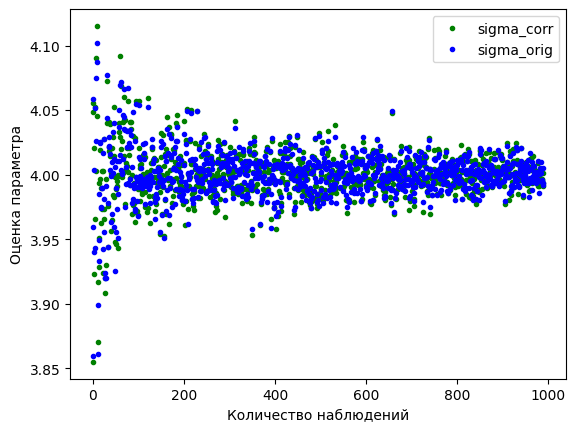

In [ ]:
plt.plot(sigma_corr,'g.', label='sigma_corr')
plt.plot(sigma_original,'b.', label='sigma_orig')
plt.xlabel('Количество наблюдений')
plt.ylabel('Оценка параметра')
plt.legend()
plt.show()

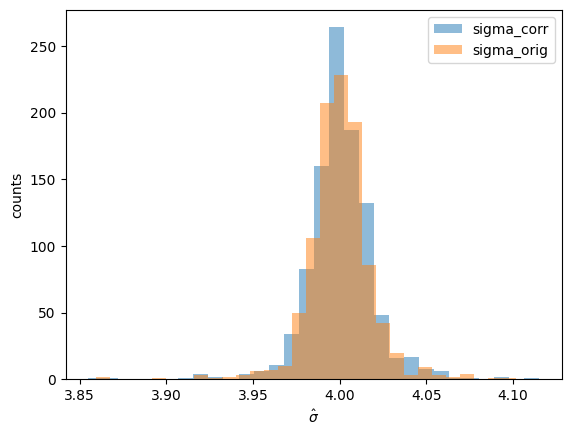

In [ ]:
plt.hist(sigma_corr,label='sigma_corr', alpha=0.5, bins=30)
plt.hist(sigma_original, label='sigma_orig', alpha=0.5,  bins=30)
plt.legend()
plt.xlabel('$\hat{\sigma}$', fontsize=10)
plt.ylabel('counts', fontsize=10)
plt.show()

In [ ]:
np.var(sigma_corr)

0.00038709493683792434

In [ ]:
np.var(sigma_original)

0.00036034246817061543

Разброс примерно одинаковый, но sigma_original чуть эффективнее

**Бонус (1 балл):**

Прикрепите фотографию того, как вы провели этот февраль. Какую самую классную эмоцию вы испытали за прошедший месяц?

Мой прошедший месяц это был июнь, хочется уже отдыхать :)) Стараюсь думать позитивно, что закрою модуль по прикладной статистики

А в февраль ходил кататься на сноуборде, всем советую обязательно попробовать!

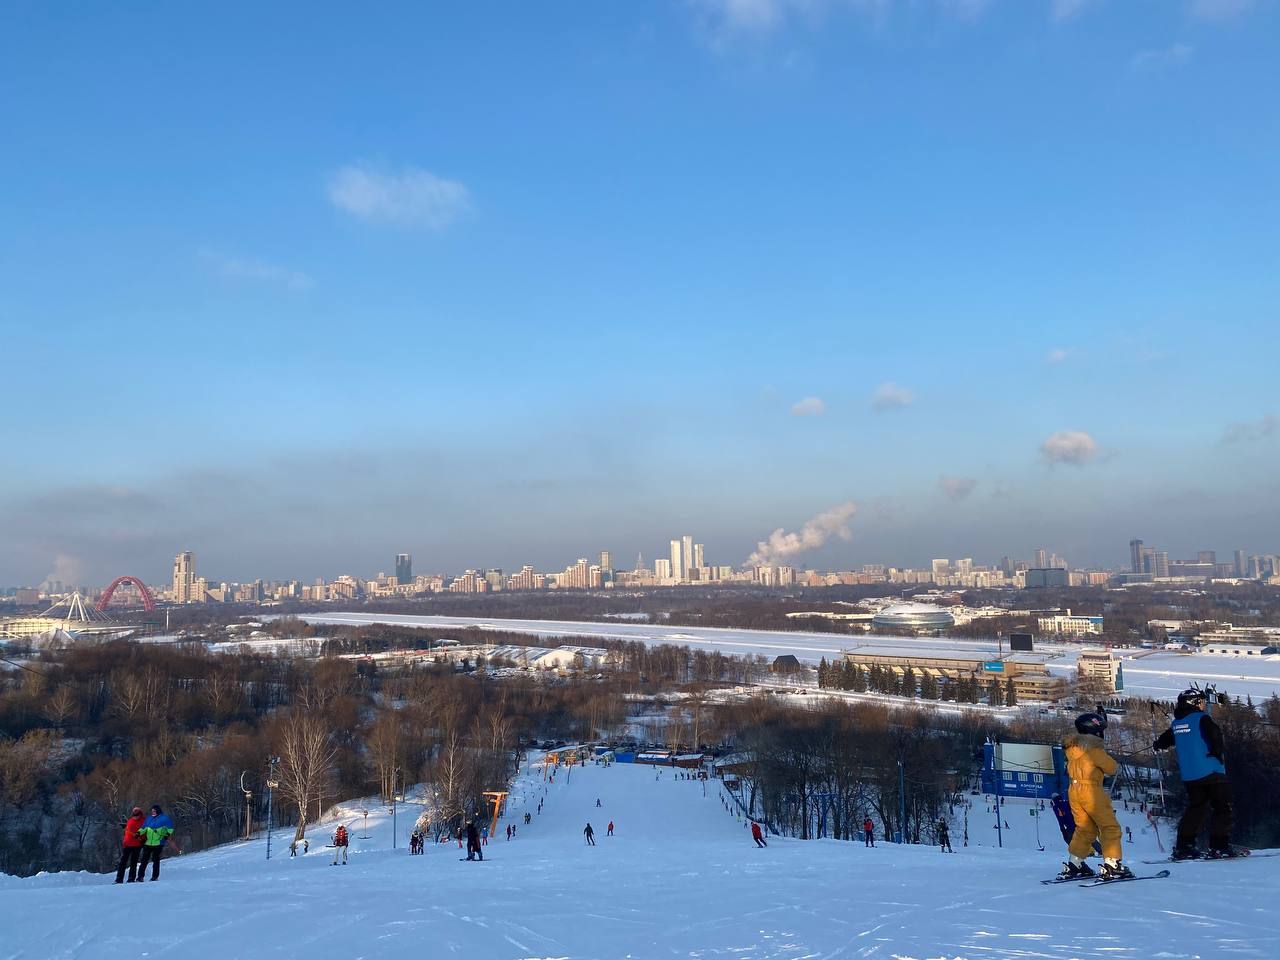